<a href="https://colab.research.google.com/github/shahchayan9/EDA/blob/main/TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Analysis - Initial Setup and EDA

In [ ]:
# Import necessary libraries
!pip install kagglehub pandas numpy matplotlib seaborn scikit-learn lazypredict

import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rohitsahoo/sales-forecasting")

print("Path to dataset files:", path)


100%|██████████| 480k/480k [00:00<00:00, 26.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/rohitsahoo/sales-forecasting/versions/2


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)
import pandas as pd

# Load the dataset using the exact path from kagglehub
df = pd.read_csv('/root/.cache/kagglehub/datasets/rohitsahoo/sales-forecasting/versions/2/train.csv')
print(df.head())  # Display the first few rows to confirm it loaded correctly

100%|██████████| 66.0M/66.0M [00:00<00:00, 149MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United 

In [ ]:
# Download the dataset
print("Part 0: Data Loading")
print("="*70)

def load_and_prepare_data():
    """
    Load and prepare the time series dataset
    """


    # Convert date column to datetime
    df['Date'] = pd.to_datetime(df['Date'])

    print("Dataset loaded successfully!")
    print(f"Dataset shape: {df.shape}")
    return df

Part 0: Data Loading


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

def explore_timeseries_data(df):
    """
    Perform initial exploratory data analysis
    """
    print("\nPart A.1: Initial Data Exploration")
    print("="*70)

    # Convert Order Date to datetime with correct format
    df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
    df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')

    # Basic information
    print("\n1. Dataset Overview:")
    print(df.info())

    # Summary statistics
    print("\n2. Summary Statistics:")
    print(df.describe())

    # Check missing values
    print("\n3. Missing Values:")
    print(df.isnull().sum())

    # Time series specific information
    print("\n4. Time Range:")
    print(f"Start Date: {df['Order Date'].min()}")
    print(f"End Date: {df['Order Date'].max()}")
    print(f"Total Time Period: {(df['Order Date'].max() - df['Order Date'].min()).days} days")

    return df

In [ ]:
def visualize_timeseries_patterns(df):
    """
    Create detailed visualizations for time series data
    """
    print("\nPart A.2: Time Series Visualization")
    print("="*70)

    # 1. Daily Sales Trend
    plt.figure(figsize=(15, 6))
    daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()
    plt.plot(daily_sales['Order Date'], daily_sales['Sales'])
    plt.title('Daily Sales Over Time')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # 2. Monthly Sales Trend
    monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()
    plt.figure(figsize=(15, 6))
    monthly_sales.plot(kind='bar')
    plt.title('Monthly Sales')
    plt.xlabel('Month')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # 3. Sales by Category and Region
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

    # Category Analysis
    sns.boxplot(data=df, x='Category', y='Sales', ax=ax1)
    ax1.set_title('Sales Distribution by Category')
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

    # Region Analysis
    sns.boxplot(data=df, x='Region', y='Sales', ax=ax2)
    ax2.set_title('Sales Distribution by Region')
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

    plt.tight_layout()
    plt.show()

    # 4. Segment Analysis
    plt.figure(figsize=(10, 6))
    df.groupby('Segment')['Sales'].sum().plot(kind='pie', autopct='%1.1f%%')
    plt.title('Sales Distribution by Segment')
    plt.axis('equal')
    plt.show()

    # 5. Ship Mode Analysis
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='Ship Mode', y='Sales')
    plt.title('Sales Distribution by Shipping Mode')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [ ]:
def preprocess_timeseries_data(df):
    """
    Preprocess time series data
    """
    print("\nPart A.3: Data Preprocessing")
    print("="*70)

    # Create copy of dataframe
    df_processed = df.copy()

    # 1. Create time-based features
    print("\n1. Creating time-based features...")
    df_processed['Year'] = df_processed['Order Date'].dt.year
    df_processed['Month'] = df_processed['Order Date'].dt.month
    df_processed['DayOfWeek'] = df_processed['Order Date'].dt.dayofweek
    df_processed['Quarter'] = df_processed['Order Date'].dt.quarter
    df_processed['DayOfMonth'] = df_processed['Order Date'].dt.day
    df_processed['WeekOfYear'] = df_processed['Order Date'].dt.isocalendar().week

    # 2. Calculate delivery metrics
    print("\n2. Calculating delivery metrics...")
    df_processed['Shipping_Days'] = (df_processed['Ship Date'] -
                                   df_processed['Order Date']).dt.days

    # 3. Create lag features
    print("\n3. Creating lag features...")
    # Monthly lag by category
    df_processed['Month_Year'] = df_processed['Order Date'].dt.to_period('M')
    monthly_sales = df_processed.groupby(['Category', 'Month_Year'])['Sales'].sum().reset_index()
    monthly_sales['Previous_Month_Sales'] = monthly_sales.groupby('Category')['Sales'].shift(1)

    # 4. Encode categorical variables
    print("\n4. Encoding categorical variables...")
    categorical_cols = ['Ship Mode', 'Segment', 'Region', 'Category', 'Sub-Category']
    df_processed = pd.get_dummies(df_processed, columns=categorical_cols)

    # 5. Drop unnecessary columns
    print("\n5. Dropping unnecessary columns...")
    columns_to_drop = ['Row ID', 'Order ID', 'Customer ID', 'Customer Name',
                      'Country', 'City', 'State', 'Product ID', 'Product Name',
                      'Order Date', 'Ship Date', 'Month_Year']
    df_processed = df_processed.drop(columns=columns_to_drop)

    # 6. Handle missing values
    print("\n6. Handling missing values...")
    df_processed = df_processed.dropna()

    print("\nPreprocessing completed!")
    print(f"Final dataset shape: {df_processed.shape}")
    print("\nFeature names:", df_processed.columns.tolist())

    return df_processed

Starting Time Series Analysis...

Part A.1: Initial Data Exploration

1. Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   o

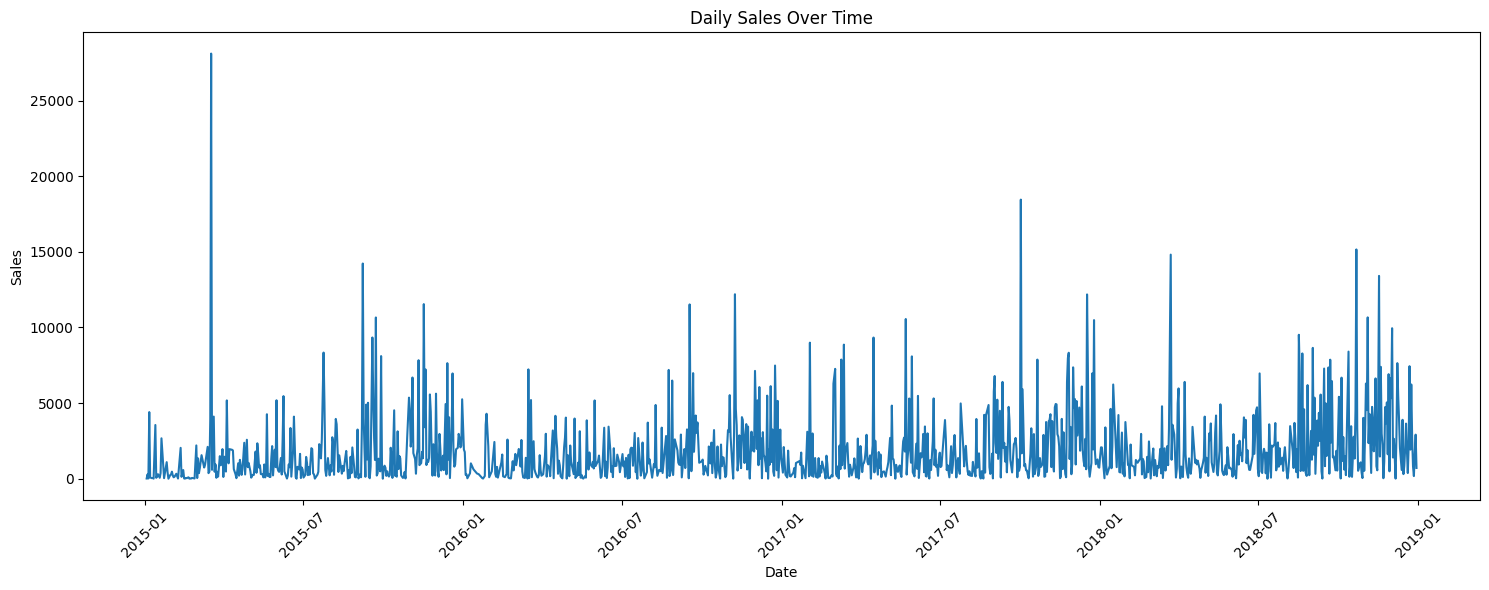

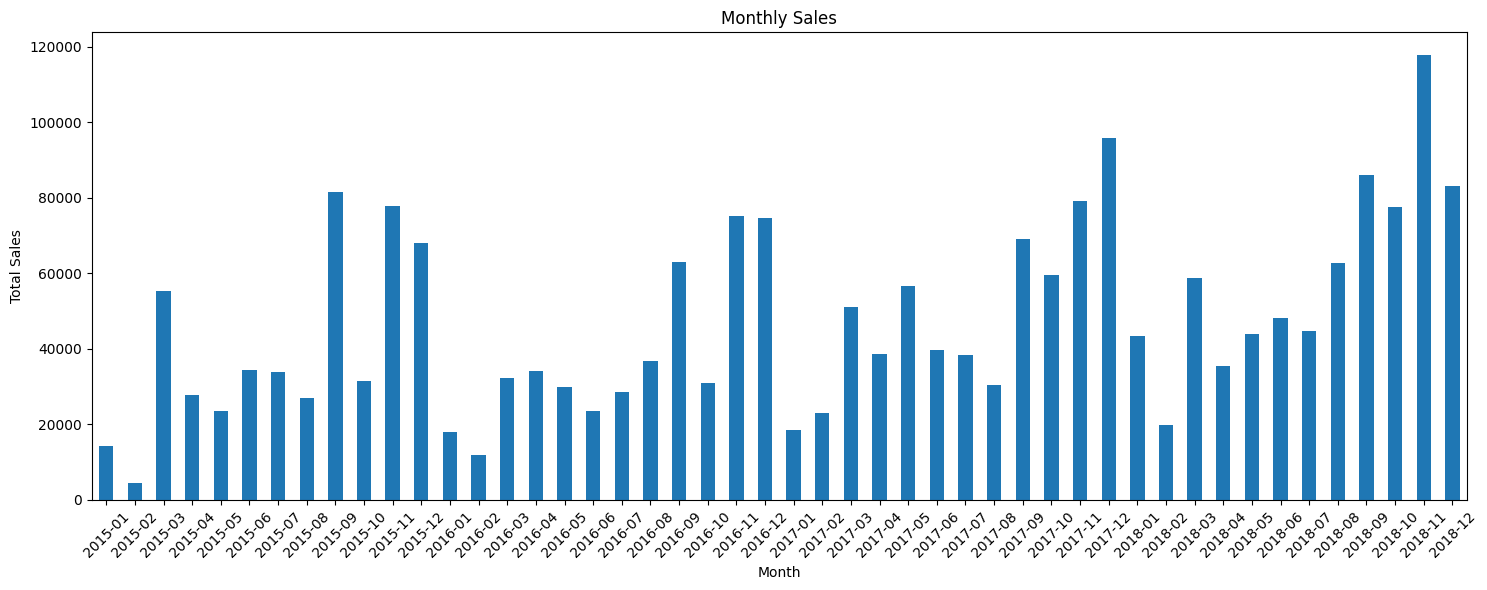

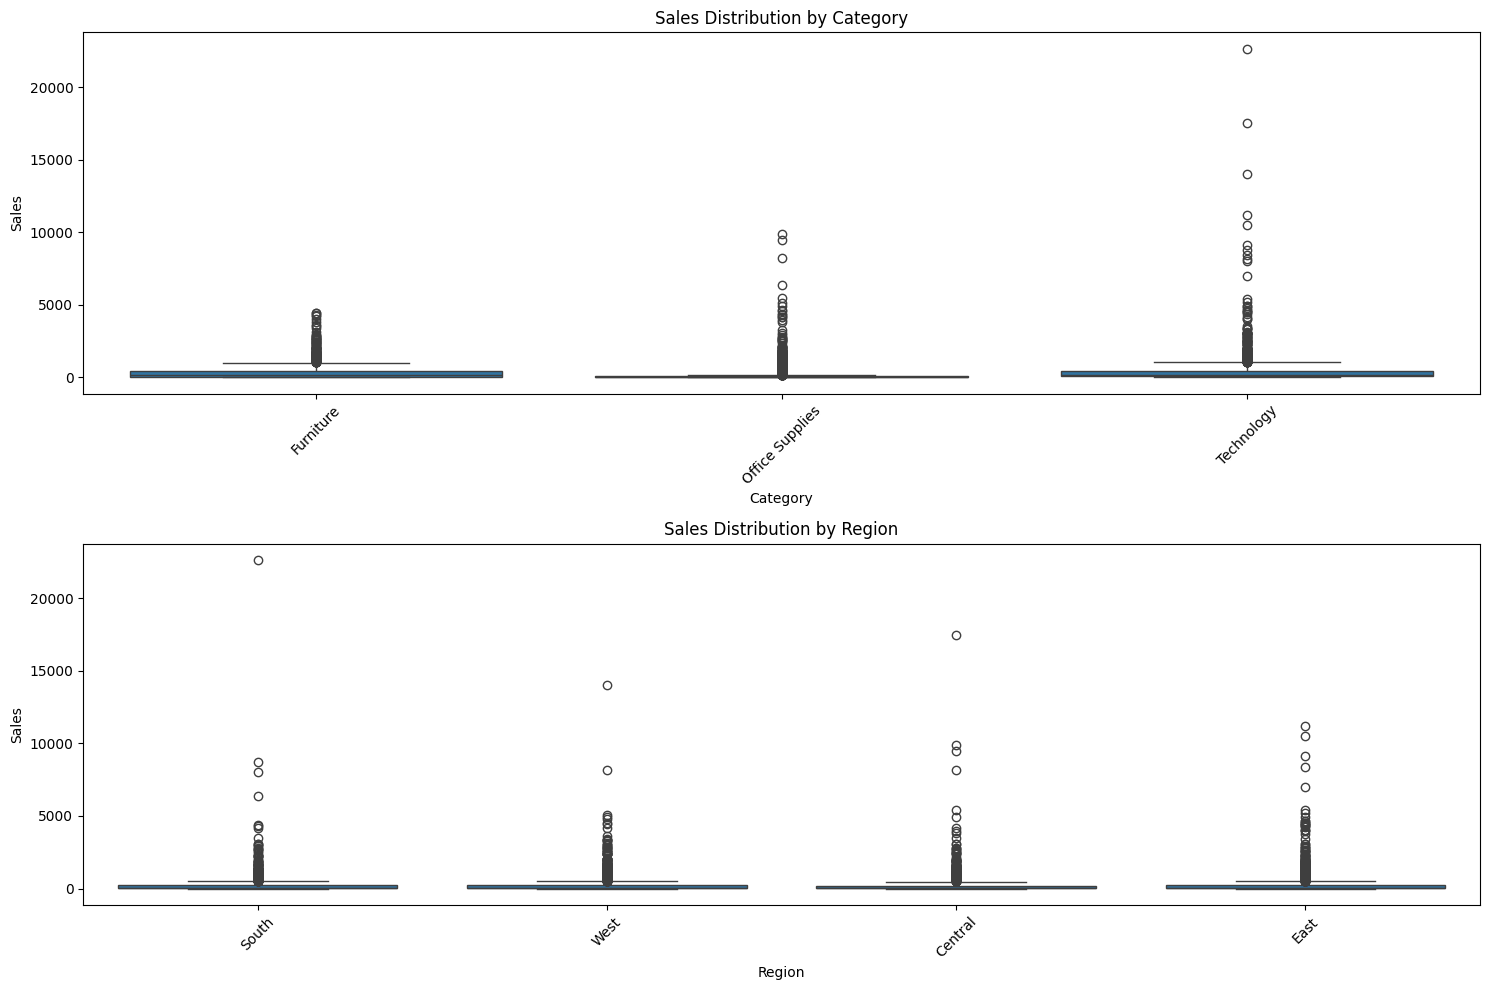

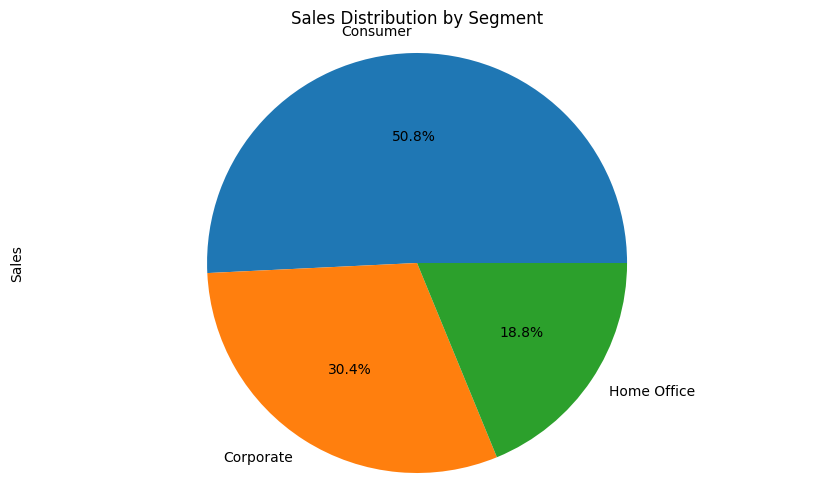

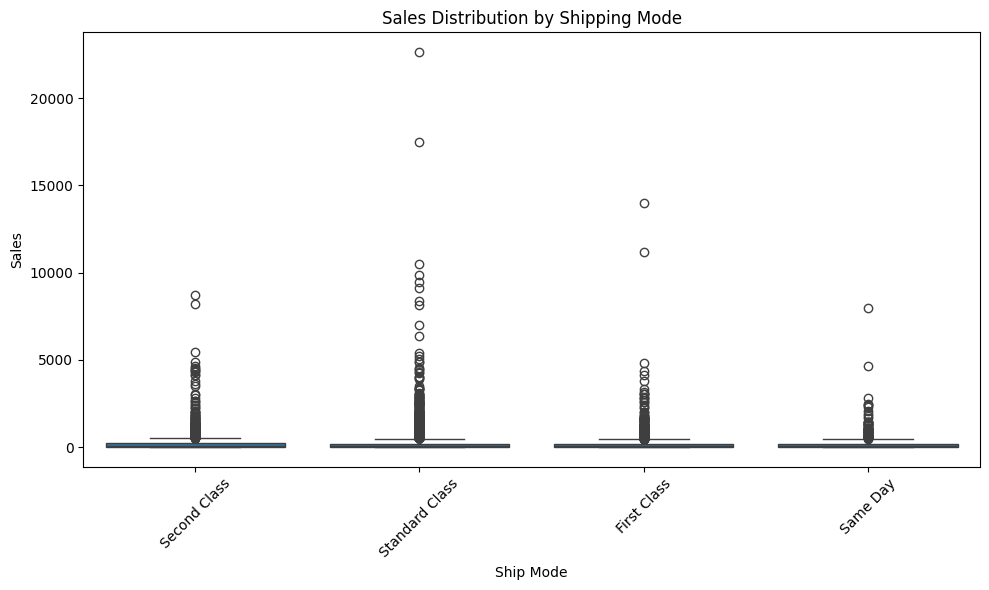


Part A.3: Data Preprocessing

1. Creating time-based features...

2. Calculating delivery metrics...

3. Creating lag features...

4. Encoding categorical variables...

5. Dropping unnecessary columns...

6. Handling missing values...

Preprocessing completed!
Final dataset shape: (9789, 40)

Feature names: ['Postal Code', 'Sales', 'Year', 'Month', 'DayOfWeek', 'Quarter', 'DayOfMonth', 'WeekOfYear', 'Shipping_Days', 'Ship Mode_First Class', 'Ship Mode_Same Day', 'Ship Mode_Second Class', 'Ship Mode_Standard Class', 'Segment_Consumer', 'Segment_Corporate', 'Segment_Home Office', 'Region_Central', 'Region_East', 'Region_South', 'Region_West', 'Category_Furniture', 'Category_Office Supplies', 'Category_Technology', 'Sub-Category_Accessories', 'Sub-Category_Appliances', 'Sub-Category_Art', 'Sub-Category_Binders', 'Sub-Category_Bookcases', 'Sub-Category_Chairs', 'Sub-Category_Copiers', 'Sub-Category_Envelopes', 'Sub-Category_Fasteners', 'Sub-Category_Furnishings', 'Sub-Category_Labels', 'S

In [ ]:

# Execute all parts
print("Starting Time Series Analysis...")

# Load data
df = pd.read_csv('/root/.cache/kagglehub/datasets/rohitsahoo/sales-forecasting/versions/2/train.csv')

# Part A: EDA and Preprocessing
df = explore_timeseries_data(df)
visualize_timeseries_patterns(df)
df_processed = preprocess_timeseries_data(df)

print("\nPart A Completed!")

# Time Series Analysis - Part B: Clustering and Anomaly Detection

Executing Part B: Clustering and Anomaly Detection

Part B.1: Clustering Analysis

1. Preparing features for clustering...

2. Finding optimal number of clusters...


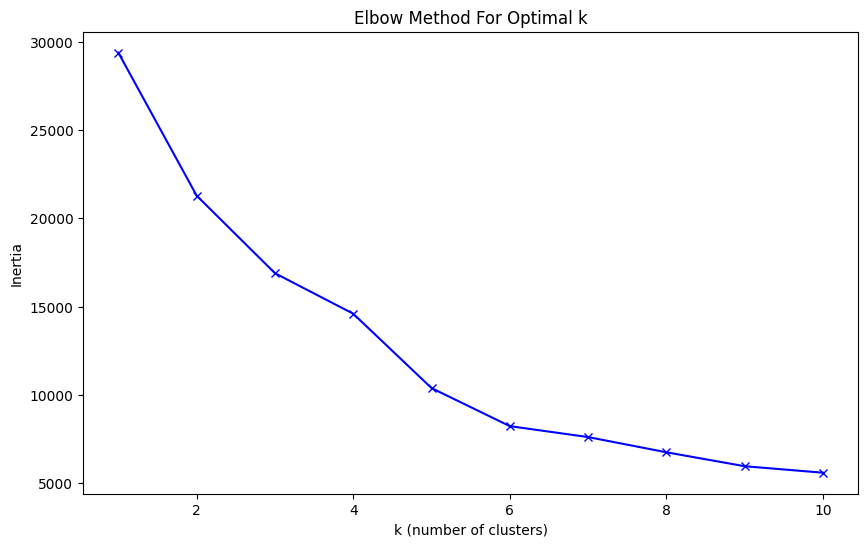


3. Performing K-means clustering with k=4...


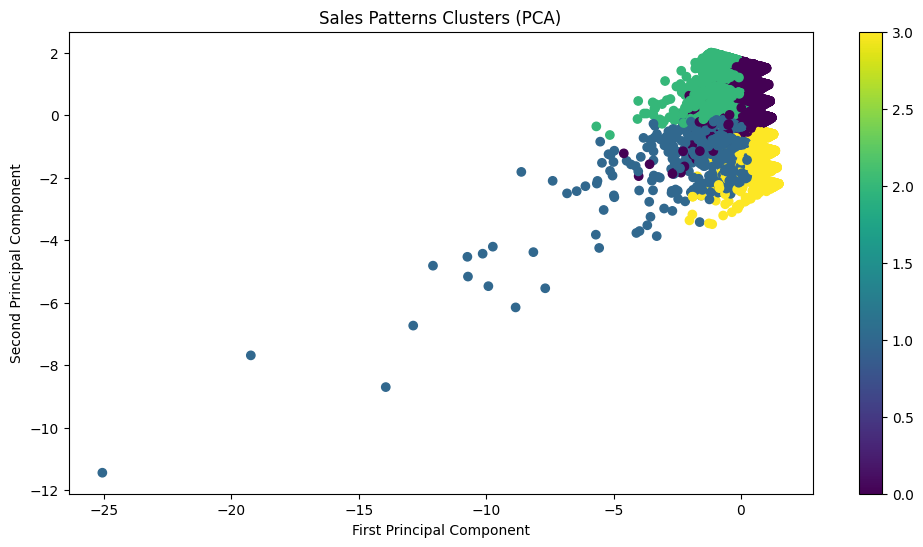


4. Cluster Analysis:

Cluster Statistics:
          Sales                Shipping_Days
           mean      std count          mean
Cluster                                     
0        198.01   378.73  3412          4.96
1        462.97  1289.20  1651          2.06
2        167.34   309.81  3127          4.96
3        180.97   341.38  1599          1.83

Part B.2: Anomaly Detection

1. Preparing features for anomaly detection...

2. Detecting anomalies using Isolation Forest...


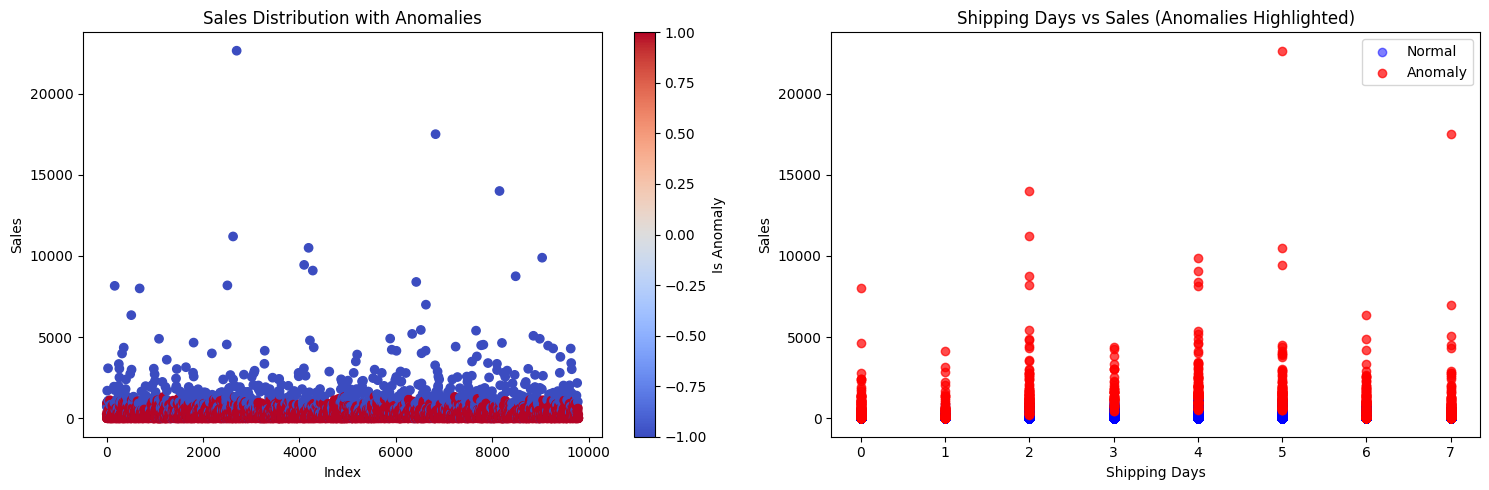


3. Anomaly Analysis:

Percentage of anomalies detected: 10.001021554806416 %

Sales Statistics by Anomaly Status:
              Sales                          Shipping_Days
               mean      std   min       max          mean
Is_Anomaly                                                
-1          1174.35  1614.59  1.98  22638.48          3.54
 1           125.19   186.91  0.44   1325.85          4.01

4. Anomaly Distribution:


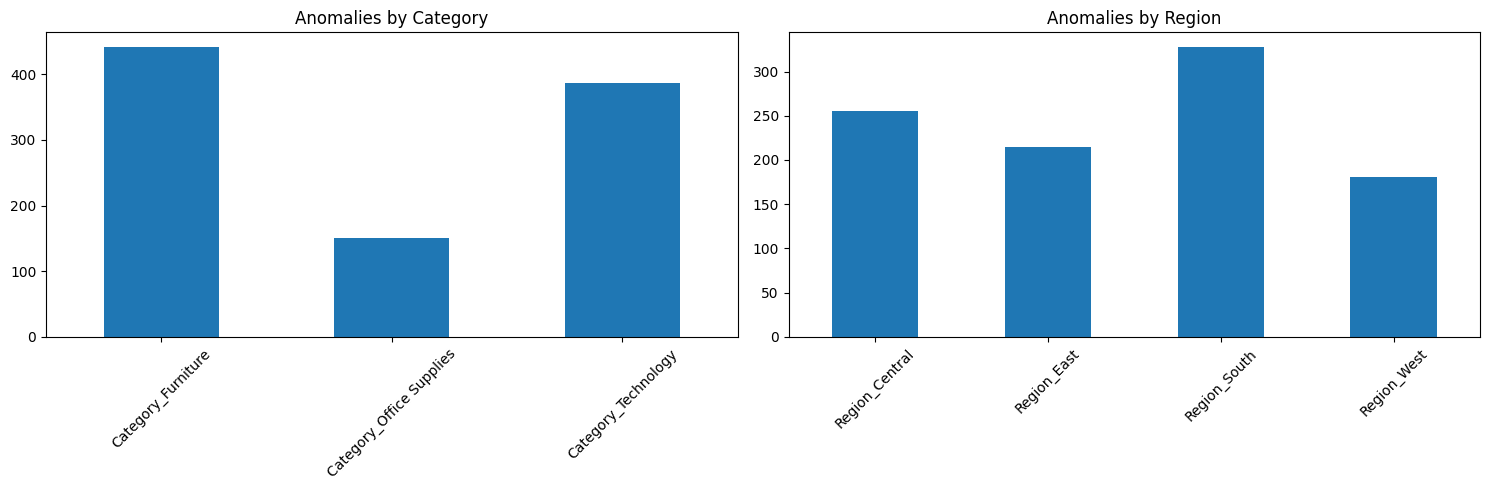


Part B Completed!


In [ ]:
# Import additional libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def perform_clustering_analysis(df_processed):
    """
    Perform clustering analysis on sales patterns
    """
    print("\nPart B.1: Clustering Analysis")
    print("="*70)

    # Select numerical features for clustering
    print("\n1. Preparing features for clustering...")
    numerical_features = df_processed.select_dtypes(include=['float64', 'int64']).columns
    X = df_processed[numerical_features]

    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Determine optimal number of clusters using elbow method
    print("\n2. Finding optimal number of clusters...")
    inertias = []
    K = range(1, 11)

    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_scaled)
        inertias.append(kmeans.inertia_)

    # Plot elbow curve
    plt.figure(figsize=(10, 6))
    plt.plot(K, inertias, 'bx-')
    plt.xlabel('k (number of clusters)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method For Optimal k')
    plt.show()

    # Perform clustering with optimal k
    optimal_k = 4  # Based on elbow curve
    print(f"\n3. Performing K-means clustering with k={optimal_k}...")

    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)

    # Add cluster labels to dataframe
    df_processed['Cluster'] = clusters

    # Visualize clusters using PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    plt.figure(figsize=(12, 6))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
    plt.title('Sales Patterns Clusters (PCA)')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.colorbar(scatter)
    plt.show()

    # Analyze clusters
    print("\n4. Cluster Analysis:")
    cluster_stats = df_processed.groupby('Cluster').agg({
        'Sales': ['mean', 'std', 'count'],
        'Shipping_Days': 'mean'
    }).round(2)
    print("\nCluster Statistics:")
    print(cluster_stats)

    return df_processed

def detect_sales_anomalies(df_processed):
    """
    Perform anomaly detection on sales patterns
    """
    print("\nPart B.2: Anomaly Detection")
    print("="*70)

    # Prepare features for anomaly detection
    print("\n1. Preparing features for anomaly detection...")
    features_for_anomaly = ['Sales', 'Shipping_Days'] + \
                          [col for col in df_processed.columns if col.startswith(('Category_', 'Region_'))]
    X_anomaly = df_processed[features_for_anomaly]

    # Scale features
    scaler = StandardScaler()
    X_anomaly_scaled = scaler.fit_transform(X_anomaly)

    # Perform Isolation Forest anomaly detection
    print("\n2. Detecting anomalies using Isolation Forest...")
    iso_forest = IsolationForest(contamination=0.1, random_state=42)
    anomalies = iso_forest.fit_predict(X_anomaly_scaled)

    # Add anomaly labels to dataframe (1: normal, -1: anomaly)
    df_processed['Is_Anomaly'] = anomalies

    # Visualize anomalies
    plt.figure(figsize=(15, 5))

    # Sales distribution with anomalies
    plt.subplot(1, 2, 1)
    plt.scatter(range(len(df_processed)), df_processed['Sales'],
               c=df_processed['Is_Anomaly'], cmap='coolwarm')
    plt.title('Sales Distribution with Anomalies')
    plt.xlabel('Index')
    plt.ylabel('Sales')
    plt.colorbar(label='Is Anomaly')

    # Shipping Days vs Sales with anomalies
    plt.subplot(1, 2, 2)
    normal = df_processed[df_processed['Is_Anomaly'] == 1]
    anomalies = df_processed[df_processed['Is_Anomaly'] == -1]

    plt.scatter(normal['Shipping_Days'], normal['Sales'],
               c='blue', label='Normal', alpha=0.5)
    plt.scatter(anomalies['Shipping_Days'], anomalies['Sales'],
               c='red', label='Anomaly', alpha=0.7)
    plt.title('Shipping Days vs Sales (Anomalies Highlighted)')
    plt.xlabel('Shipping Days')
    plt.ylabel('Sales')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Analyze anomalies
    print("\n3. Anomaly Analysis:")
    print("\nPercentage of anomalies detected:",
          (df_processed['Is_Anomaly'] == -1).mean() * 100, "%")

    print("\nSales Statistics by Anomaly Status:")
    anomaly_stats = df_processed.groupby('Is_Anomaly').agg({
        'Sales': ['mean', 'std', 'min', 'max'],
        'Shipping_Days': 'mean'
    }).round(2)
    print(anomaly_stats)

    # Analyze anomalies by category and region
    print("\n4. Anomaly Distribution:")
    category_cols = [col for col in df_processed.columns if col.startswith('Category_')]
    region_cols = [col for col in df_processed.columns if col.startswith('Region_')]

    # Plot anomaly distribution by category and region
    plt.figure(figsize=(15, 5))

    # Category analysis
    category_anomalies = df_processed[df_processed['Is_Anomaly'] == -1][category_cols].sum()
    plt.subplot(1, 2, 1)
    category_anomalies.plot(kind='bar')
    plt.title('Anomalies by Category')
    plt.xticks(rotation=45)

    # Region analysis
    region_anomalies = df_processed[df_processed['Is_Anomaly'] == -1][region_cols].sum()
    plt.subplot(1, 2, 2)
    region_anomalies.plot(kind='bar')
    plt.title('Anomalies by Region')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

    return df_processed

# Execute Part B
print("Executing Part B: Clustering and Anomaly Detection")
print("="*70)

# Perform clustering
df_processed = perform_clustering_analysis(df_processed)

# Perform anomaly detection
df_processed = detect_sales_anomalies(df_processed)

print("\nPart B Completed!")

# Time Series Analysis - Part C: AutoML and Model Building

Executing Part C: AutoML and Model Building

Part C.1: Time Series Data Preparation

1. Creating target variable...

Features for modeling: ['Postal Code', 'Year', 'Month', 'DayOfWeek', 'Quarter', 'DayOfMonth', 'WeekOfYear', 'Shipping_Days', 'Ship Mode_First Class', 'Ship Mode_Same Day', 'Ship Mode_Second Class', 'Ship Mode_Standard Class', 'Segment_Consumer', 'Segment_Corporate', 'Segment_Home Office', 'Region_Central', 'Region_East', 'Region_South', 'Region_West', 'Category_Furniture', 'Category_Office Supplies', 'Category_Technology', 'Sub-Category_Accessories', 'Sub-Category_Appliances', 'Sub-Category_Art', 'Sub-Category_Binders', 'Sub-Category_Bookcases', 'Sub-Category_Chairs', 'Sub-Category_Copiers', 'Sub-Category_Envelopes', 'Sub-Category_Fasteners', 'Sub-Category_Furnishings', 'Sub-Category_Labels', 'Sub-Category_Machines', 'Sub-Category_Paper', 'Sub-Category_Phones', 'Sub-Category_Storage', 'Sub-Category_Supplies', 'Sub-Category_Tables']

Total features: 39
Total samples: 9789

100%|██████████| 42/42 [00:07<00:00,  5.98it/s]


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001810 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 348
[LightGBM] [Info] Number of data points in the train set: 1634, number of used features: 7
[LightGBM] [Info] Start training from score 247.160293

Model Comparison Results:
                               Adjusted R-Squared  R-Squared    RMSE  \
Model                                                                  
GammaRegressor                              -0.03      -0.00  478.97   
ElasticNet                                  -0.03      -0.00  478.99   
TweedieRegressor                            -0.03      -0.00  479.06   
OrthogonalMatchingPursuit                   -0.03      -0.00  479.46   
BayesianRidge                               -0.03      -0.00  479.52   
LassoLarsCV                                 -0.03      -0.00  47

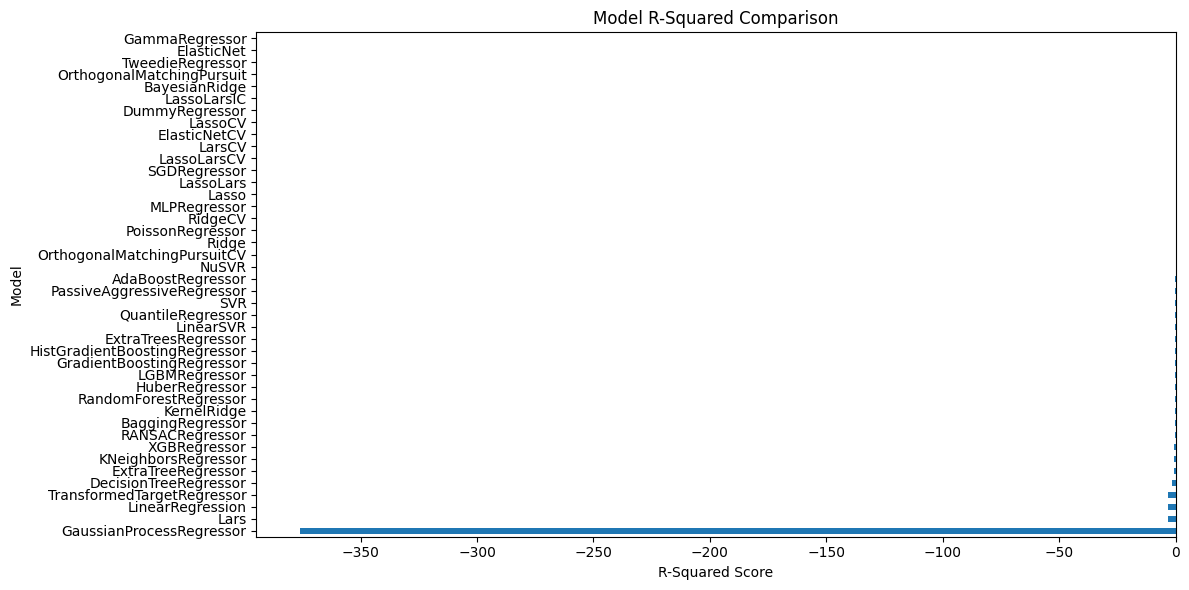


Part C.3: Building Ensemble Model

Fold 1
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000136 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 400
[LightGBM] [Info] Number of data points in the train set: 1634, number of used features: 37
[LightGBM] [Info] Start training from score 247.160293
RMSE: 490.61
MAE: 252.01
R2 Score: -0.05

Fold 2
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000279 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 3265, number of used feat

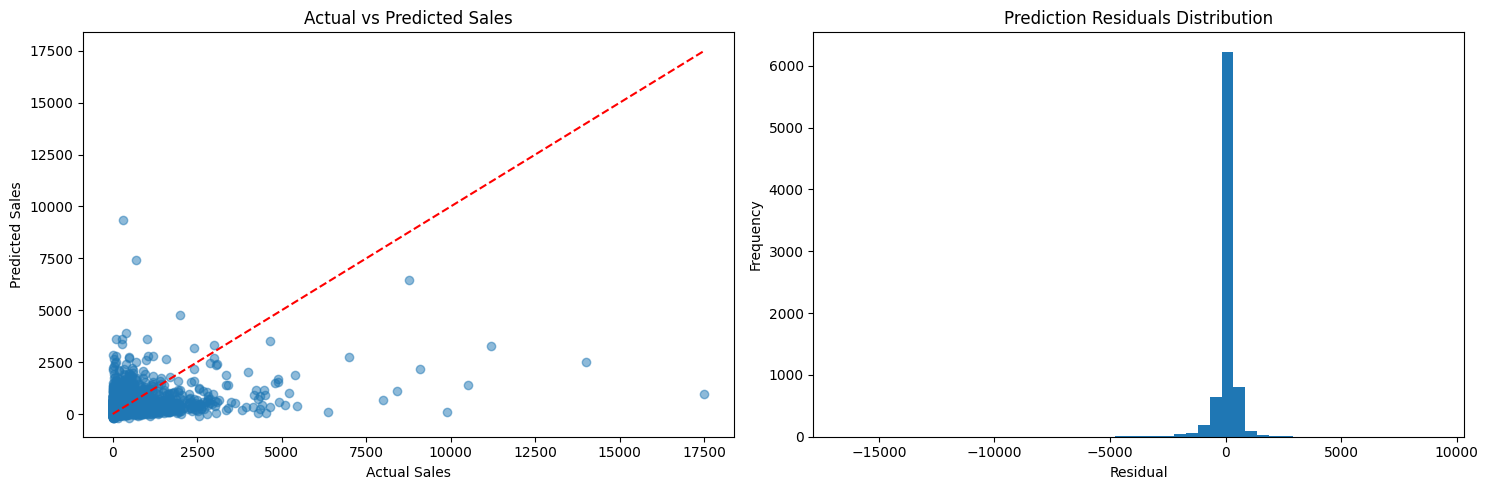

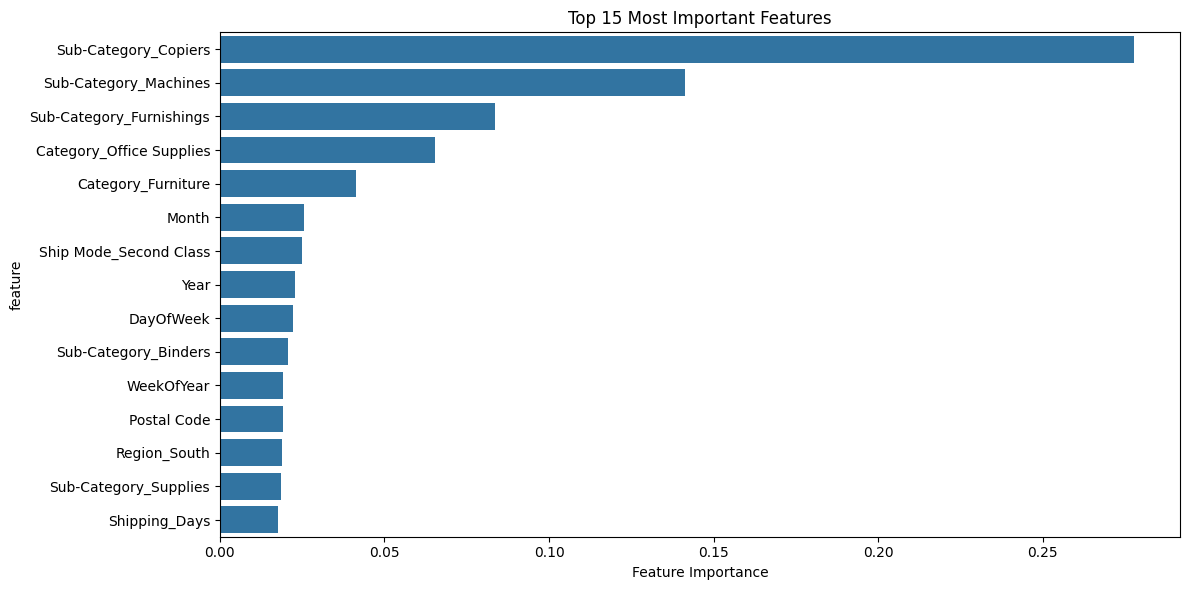


Part C.4: Prediction Analysis

Overall Model Performance:
RMSE: 390.91
MAE: 167.35
R2 Score: 0.61

Top 10 Most Important Features:
                     feature  importance
28      Sub-Category_Copiers        0.28
33     Sub-Category_Machines        0.14
31  Sub-Category_Furnishings        0.08
20  Category_Office Supplies        0.07
19        Category_Furniture        0.04
2                      Month        0.03
10    Ship Mode_Second Class        0.03
1                       Year        0.02
3                  DayOfWeek        0.02
25      Sub-Category_Binders        0.02

Model saved as 'sales_prediction_model.joblib'

Part C Completed!


In [ ]:
# Import required libraries
!pip install lazypredict xgboost lightgbm

import pandas as pd
import numpy as np
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import VotingRegressor
import matplotlib.pyplot as plt
import seaborn as sns

def prepare_time_series_data(df_processed):
    """
    Prepare data for time series modeling
    """
    print("\nPart C.1: Time Series Data Preparation")
    print("="*70)

    # Ensure we're working with a copy
    df_model = df_processed.copy()

    # Create target variable (next period sales)
    print("\n1. Creating target variable...")

    # Sort by date-related features
    df_model = df_model.sort_values(['Year', 'Month', 'DayOfMonth'])

    # Target variable is 'Sales'
    X = df_model.drop(['Sales', 'Cluster', 'Is_Anomaly'], axis=1)
    y = df_model['Sales']

    # Create time series split
    tscv = TimeSeriesSplit(n_splits=5)

    print("\nFeatures for modeling:", X.columns.tolist())
    print(f"\nTotal features: {X.shape[1]}")
    print(f"Total samples: {X.shape[0]}")

    return X, y, tscv

def run_automl_comparison(X, y, tscv):
    """
    Run automated model comparison using LazyPredict
    """
    print("\nPart C.2: AutoML Model Comparison")
    print("="*70)

    # Initialize LazyRegressor
    reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)

    # Get the first split for initial comparison
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        break

    # Fit and compare models
    models_train, predictions_train = reg.fit(X_train, X_test, y_train, y_test)

    print("\nModel Comparison Results:")
    print(models_train)

    # Visualize model performance
    plt.figure(figsize=(12, 6))
    models_train['R-Squared'].sort_values().plot(kind='barh')
    plt.title('Model R-Squared Comparison')
    plt.xlabel('R-Squared Score')
    plt.tight_layout()
    plt.show()

    return models_train

def build_ensemble_model(X, y, tscv):
    """
    Build and evaluate an ensemble model
    """
    print("\nPart C.3: Building Ensemble Model")
    print("="*70)

    # Initialize base models
    base_models = [
        ('xgb', xgb.XGBRegressor(random_state=42)),
        ('lgb', lgb.LGBMRegressor(random_state=42)),
    ]

    # Create ensemble
    ensemble = VotingRegressor(estimators=base_models)

    # Store metrics for each fold
    metrics = {
        'rmse': [],
        'mae': [],
        'r2': []
    }

    # Train and evaluate using time series cross-validation
    fold = 1
    predictions = []
    actuals = []

    for train_index, test_index in tscv.split(X):
        print(f"\nFold {fold}")
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train ensemble
        ensemble.fit(X_train, y_train)

        # Make predictions
        y_pred = ensemble.predict(X_test)
        predictions.extend(y_pred)
        actuals.extend(y_test)

        # Calculate metrics
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        metrics['rmse'].append(rmse)
        metrics['mae'].append(mae)
        metrics['r2'].append(r2)

        print(f"RMSE: {rmse:.2f}")
        print(f"MAE: {mae:.2f}")
        print(f"R2 Score: {r2:.2f}")

        fold += 1

    # Visualize results
    plt.figure(figsize=(15, 5))

    # Actual vs Predicted
    plt.subplot(1, 2, 1)
    plt.scatter(actuals, predictions, alpha=0.5)
    plt.plot([min(actuals), max(actuals)], [min(actuals), max(actuals)], 'r--')
    plt.title('Actual vs Predicted Sales')
    plt.xlabel('Actual Sales')
    plt.ylabel('Predicted Sales')

    # Residuals
    plt.subplot(1, 2, 2)
    residuals = np.array(predictions) - np.array(actuals)
    plt.hist(residuals, bins=50)
    plt.title('Prediction Residuals Distribution')
    plt.xlabel('Residual')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

    # Feature importance (for XGBoost model)
    xgb_model = ensemble.named_estimators_['xgb']
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': xgb_model.feature_importances_
    }).sort_values('importance', ascending=False)

    plt.figure(figsize=(12, 6))
    sns.barplot(data=feature_importance.head(15), x='importance', y='feature')
    plt.title('Top 15 Most Important Features')
    plt.xlabel('Feature Importance')
    plt.tight_layout()
    plt.show()

    return ensemble, metrics, feature_importance

def analyze_predictions(ensemble, X, y, feature_importance):
    """
    Analyze predictions and provide insights
    """
    print("\nPart C.4: Prediction Analysis")
    print("="*70)

    # Make predictions on entire dataset
    all_predictions = ensemble.predict(X)

    # Calculate overall metrics
    overall_rmse = np.sqrt(mean_squared_error(y, all_predictions))
    overall_mae = mean_absolute_error(y, all_predictions)
    overall_r2 = r2_score(y, all_predictions)

    print("\nOverall Model Performance:")
    print(f"RMSE: {overall_rmse:.2f}")
    print(f"MAE: {overall_mae:.2f}")
    print(f"R2 Score: {overall_r2:.2f}")

    # Print top features
    print("\nTop 10 Most Important Features:")
    print(feature_importance.head(10))

    # Save model
    import joblib
    joblib.dump(ensemble, 'sales_prediction_model.joblib')
    print("\nModel saved as 'sales_prediction_model.joblib'")

# Execute Part C
print("Executing Part C: AutoML and Model Building")
print("="*70)

# Prepare data
X, y, tscv = prepare_time_series_data(df_processed)

# Run AutoML comparison
models_comparison = run_automl_comparison(X, y, tscv)

# Build and evaluate ensemble model
ensemble, metrics, feature_importance = build_ensemble_model(X, y, tscv)

# Analyze predictions
analyze_predictions(ensemble, X, y, feature_importance)

print("\nPart C Completed!")